In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import statistics as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

students = pd.read_csv('/Users/VladPo/projects/Project 2/stud_math.csv')

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
# fill in the gaps in series with value
def fill_in_gaps(series, value):
    series = series.apply(
        lambda x: value if pd.isna(x) == True else x)
    return series

# get quartiles and interquartile range
def get_quantiles(series):
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
    IQR = perc75 - perc25

    return perc25, perc75, IQR

In [4]:
display(pd.DataFrame(students.school.value_counts(dropna=False).head()))
display(pd.DataFrame(students.sex.value_counts(dropna=False).head()))
display(pd.DataFrame(students.age.value_counts(dropna=False).head(10)))

# there are no empty values in the school, sex and age columns, and the data correspond to common sense

,school
GP,349
MS,46


,sex
F,208
M,187


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [5]:
# address
display(pd.DataFrame(students.address.value_counts(dropna=False)))

# fill in the gaps in address with mode.
students.address = fill_in_gaps(students.address, st.mode(students.address))

,address
U,295
R,83
NaN,17


In [6]:
# family size
display(pd.DataFrame(students.famsize.value_counts(dropna=False)))
# fill in the gaps in famsize with None.
students.famsize = fill_in_gaps(students.famsize, None)

,famsize
GT3,261
LE3,107
NaN,27


In [7]:
# Parents status
display(pd.DataFrame(students.Pstatus.value_counts(dropna=False)))

# fill in the gaps in Pstatus with mode.
students.Pstatus = fill_in_gaps(students.Pstatus, st.mode(students.Pstatus))

,Pstatus
T,314
NaN,45
A,36


In [8]:
# consider these columns together:
#     schoolsup — additional education
#     famsup — additional family education
#     paid —  additional mathematics course
#     activities — additional extra curricular activities
#     nursery — attended a nursery
#     higher — wants to get a higher education
#     internet — has Internet at home
#     romantic — in a romantic relationship


for column in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    display(pd.DataFrame(students[column].value_counts(dropna=False)))

    # in columns where less than 5 percent of the data is not filled in,
    # fill in the gaps with mode, in other cases fill in with None
    if round(students[column].astype(str).value_counts(dropna=False, normalize=True).loc['nan'], 2) <= 0.05:
        students[column] = fill_in_gaps(
            students[column], st.mode(students[column]))
    else:
        students[column] = fill_in_gaps(students[column], None)

,schoolsup
no,335
yes,51
NaN,9


,famsup
yes,219
no,137
NaN,39


,paid
no,200
yes,155
NaN,40


,activities
yes,195
no,186
NaN,14


,nursery
yes,300
no,79
NaN,16


,higher
yes,356
NaN,20
no,19


,internet
yes,305
no,56
NaN,34


,romantic
no,240
yes,124
NaN,31


In [9]:
# mother's education
display(pd.DataFrame(students.Medu.value_counts(dropna=False).head(10)))

# there are few gaps, so fill in the arithmetic mean. but since the arithmetic mean is 2.75,
# and the column is categorical, round it to an integer.
students.Medu = fill_in_gaps(students.Medu, float(round(students.Medu.mean())))

# convert to string
students.Medu = students.Medu.astype(str)

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


In [10]:
# father's education
display(pd.DataFrame(students.Fedu.value_counts(dropna=False).head(10)))

# obviously, the value 40 is a typo, change it to 4
for i in range(0, len(students.Fedu)):
    if students.Fedu[i] == 40:
        students.Fedu[i] = 4

# the Fedu column has a small percentage of empty values,
# while other values are almost equally divided between categories 1-4.
# fill in the gaps randomly with values 1-4

for j in range(0, len(students.Fedu)):
    if students.Fedu.astype(str).loc[j] == 'nan':
        np.random.seed(j)
        students.Fedu[j] = np.random.randint(1, 4)

# convert to string
students.Fedu = students.Fedu.astype(str)

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


In [11]:
# mother's job
# father's job
display(pd.DataFrame(students.Mjob.value_counts(dropna=False).head(10)))
display(pd.DataFrame(students.Fjob.value_counts(dropna=False).head(10)))

# more than 50% of the values in the Fjob - 'other' column so it's not informative.
# drop this column
students = students.drop(['Fjob'], axis=1)

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


In [12]:
# there are few empty values in the Mjob column,
# and different professions do not have a huge spread in frequency.
# fill in the gaps randomly

job_titles = ['services', 'teacher', 'at_home', 'health', 'other']

for j in range(0, len(students.Mjob)):
    if students.Mjob.astype(str).loc[j] == 'nan':
        np.random.seed(j)
        students.Mjob[j] = job_titles[np.random.randint(0, len(job_titles))]

In [13]:
# reason for choosing a school
display(pd.DataFrame(students.reason.value_counts(dropna=False)))

# there are few empty values in the reason column,
# fill in the gaps randomly

reasons = ['course', 'home', 'reputation', 'other']

for j in range(0, len(students.reason)):
    if students.reason.astype(str).loc[j] == 'nan':
        np.random.seed(j)
        students.reason[j] = reasons[np.random.randint(0, len(reasons))]

,reason
course,137
home,104
reputation,103
other,34
NaN,17


In [14]:
# guardian
display(pd.DataFrame(students.guardian.value_counts(dropna=False)))

# there are few empty values in the reason column,
# fill in the gaps randomly

guardians = ['mother', 'father', 'other']

for j in range(0, len(students.guardian)):
    if students.guardian.astype(str).loc[j] == 'nan':
        np.random.seed(j)
        students.guardian[j] = guardians[np.random.randint(0, len(guardians))]

,guardian
mother,250
father,86
NaN,31
other,28


In [15]:
# travel time to school
display(pd.DataFrame(students.traveltime.value_counts(dropna=False)))

# fill in the gaps with mode
students.traveltime = fill_in_gaps(
    students.traveltime, st.mode(students.traveltime))

# time to study in addition to school per week and granular
display(pd.DataFrame(students.studytime.value_counts(dropna=False)))
display(pd.DataFrame(
    students['studytime, granular'].value_counts(dropna=False)))

# 'studytime' and 'studytime, granular' are fully correlated, drop the 'studytime, granular'column
students = students.drop(['studytime, granular'], axis=1)

# fill in the gaps with mode
students.studytime = fill_in_gaps(
    students.studytime, st.mode(students.studytime))

# convert to string
students.traveltime = students.traveltime.astype(str)
students.studytime = students.studytime.astype(str)

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


In [16]:
# quantity of extra curricular failures
# fill in the gaps with mode
display(pd.DataFrame(students.failures.value_counts(dropna=False)))
students.failures = fill_in_gaps(students.failures, st.mode(students.failures))

# convert to string
students.failures = students.failures.astype(str)

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


In [17]:
# consider these columns together:
#     famrel - family relationships
#     goout-time spent with friends
#     freetime
#     health


for column in ['famrel', 'freetime', 'goout', 'health']:
    
    # in columns where less than 5 percent of the data is not filled in,
    # fill in the gaps with mode, in other cases fill in with None

    if round(students[column].astype(str).value_counts(dropna=False, normalize=True).loc['nan'], 2) <= 0.05:
        students[column] = fill_in_gaps(students[column], st.mode(students[column]))
    else:
        students[column] = fill_in_gaps(students[column], None)

    display(pd.DataFrame(students[column].value_counts(dropna=False)))
    
    # convert to string
    students[column] = students[column].astype(str)

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


,health
5.0,153
3.0,89
4.0,63
1.0,47
2.0,43


In [18]:
# the famrel column has a single value (-1) that does not match the description and gradation of points.
# obviously this is a typo, change it to 1.

for i in range(0, len(students.famrel)):
    if students.famrel[i] == -1:
        students.famrel[i] = 1
display(pd.DataFrame(students.famrel.value_counts(dropna=False)))

,famrel
4.0,182
5.0,99
3.0,62
nan,27
2.0,17
1.0,7
-1.0,1


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

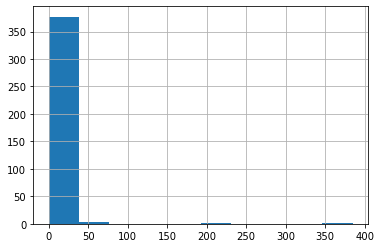

In [19]:
# absences
students.absences.hist()
students.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 12.0].


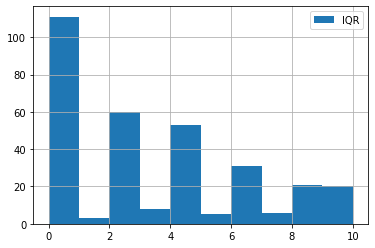

In [20]:
# find outliars
perc25, perc75, IQR = get_quantiles(students.absences)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      'IQR: {}, '.format(IQR), 'Границы выбросов: [{f}, {l}].'.format(f=perc25 - 1.5*IQR, l=perc25 + 1.5*IQR))
students.absences.loc[students.absences.between(
    perc25 - 1.5*IQR, perc25 + 1.5*IQR)].hist(bins=10, range=(0, 10), label='IQR')
plt.legend()

In [21]:
# to drop the outliars
students = students.loc[students.absences.between(
    perc25 - 1.5*(perc75 - perc25), perc75 + 1.5*(perc75 - perc25))]

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

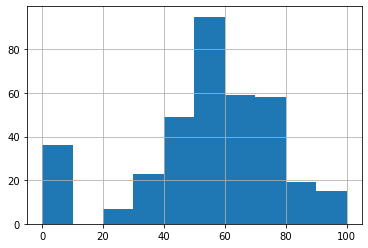

In [22]:
# math score
students.score.hist()
students.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


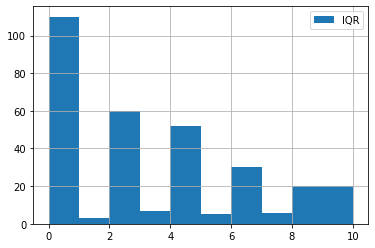

In [23]:
# find outliars
perc25, perc75, IQR = get_quantiles(students.score)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 10),
                                                                                       label='IQR')
plt.legend()

In [24]:
# outliars limits: [-5.0, 115.0]. min=0, max=100, so there are no emissions.
# but there are a lot of "0" marks, it looks like a typo, or the student didn't show up for the exam,
# because the next highest score is "25"! there are also a few empty values.

# drop null values
students = students.loc[students.score.between(25, 100)]

# there are several empty values, fill in the arithmetic mean
students.score = fill_in_gaps(students.score, students.score.mean())

In [25]:
# correlation of quantitative values
students.corr()

,age,absences,score
age,1.000000,0.20953,-0.131938
absences,0.209530,1.00000,-0.242220
score,-0.131938,-0.24222,1.000000


In [26]:
# boxplot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [27]:
# t-test
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

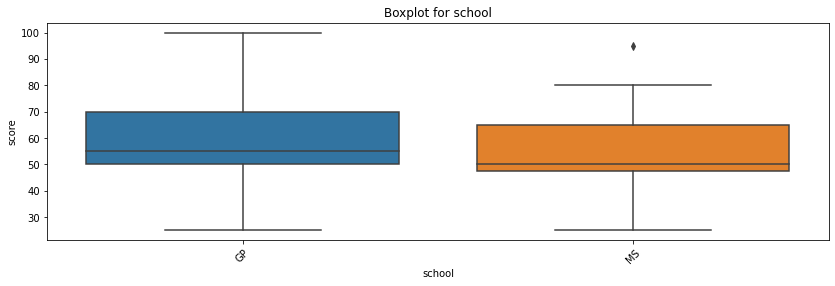

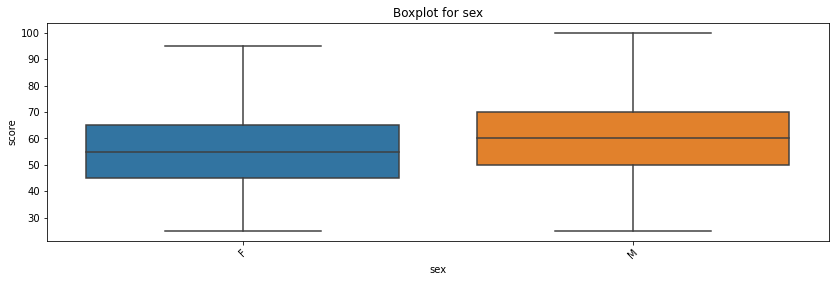

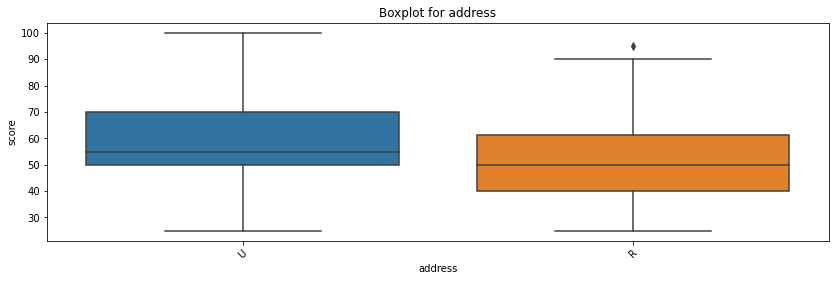

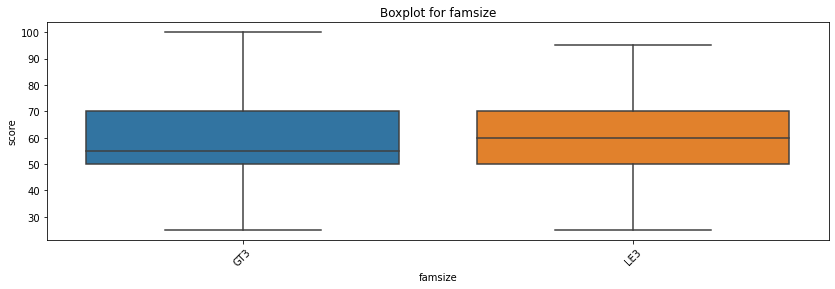

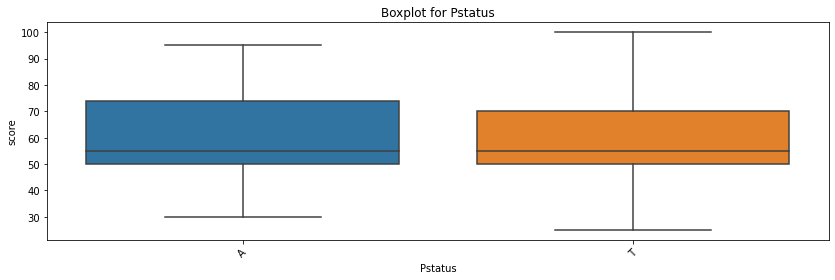

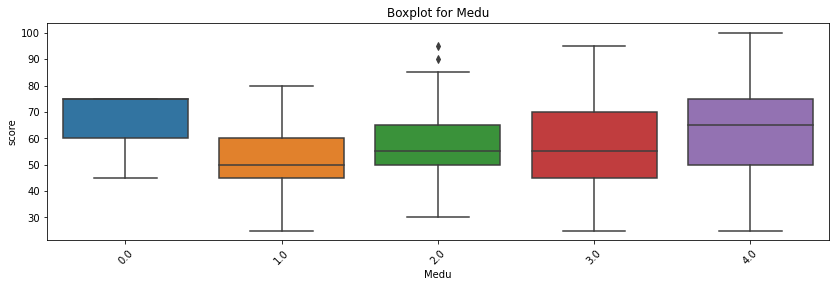

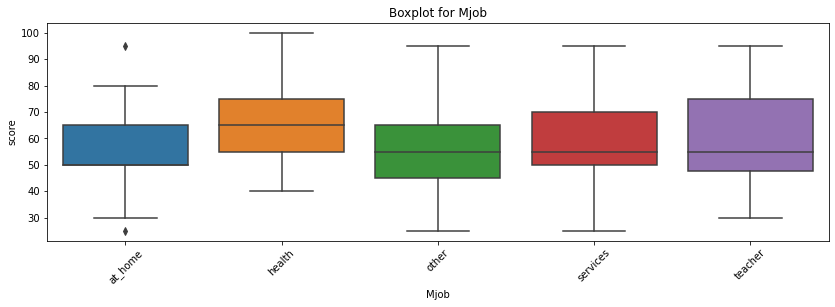

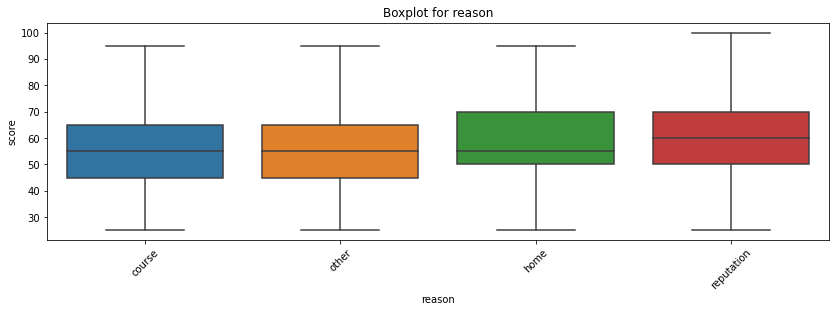

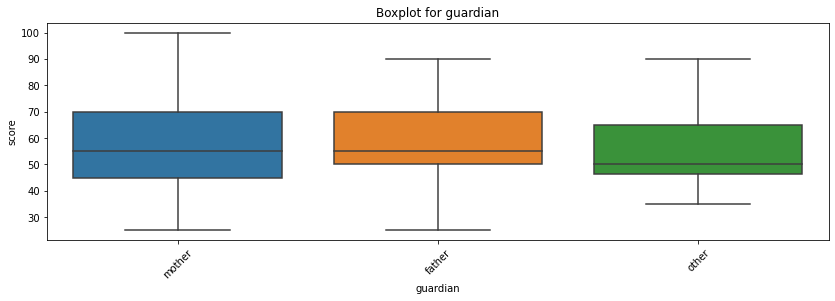

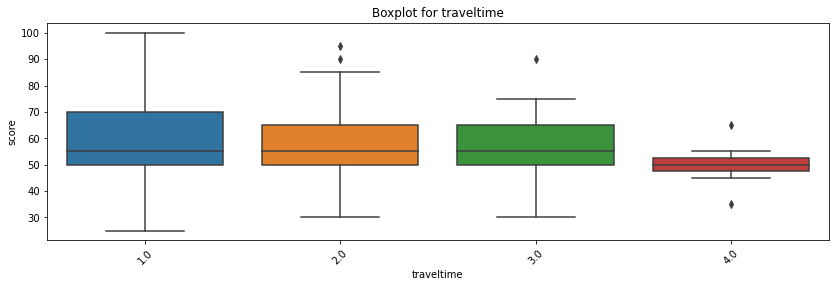

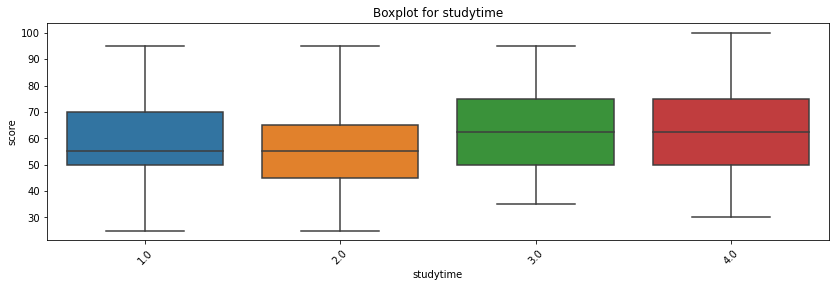

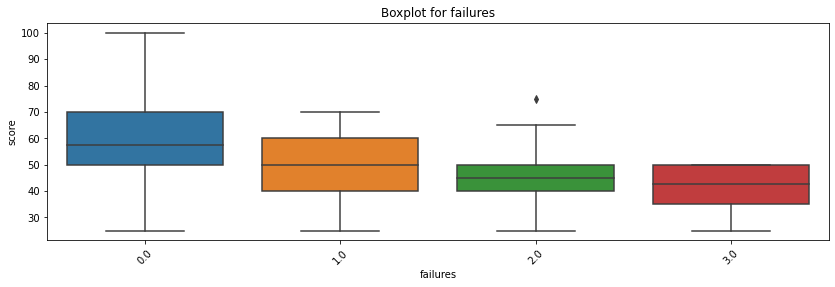

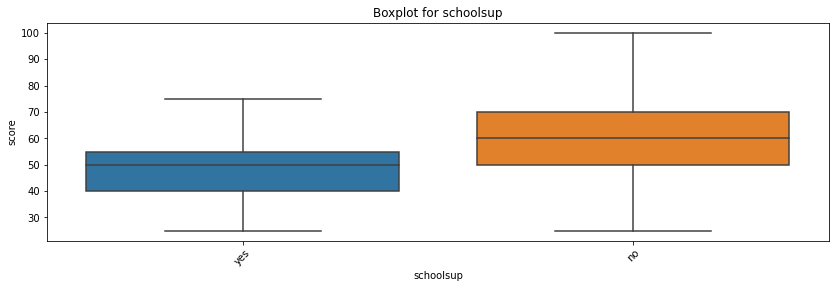

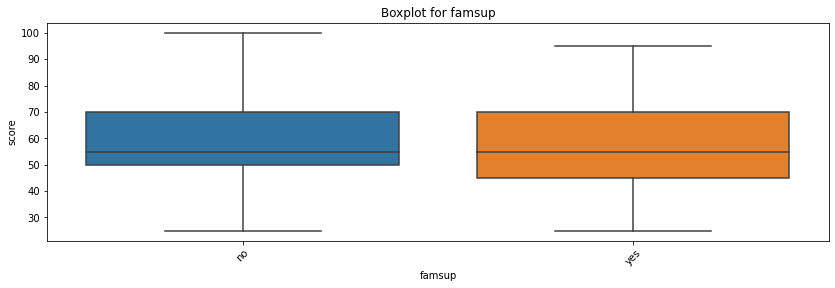

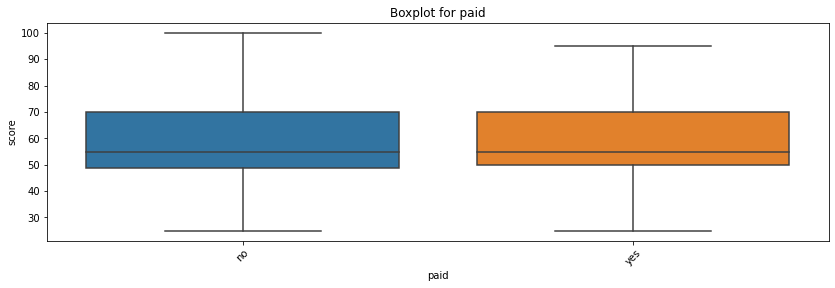

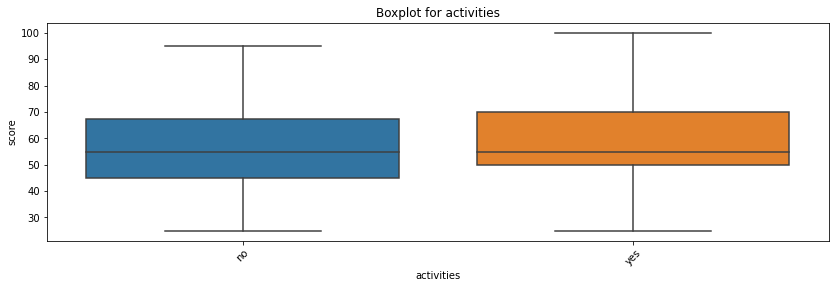

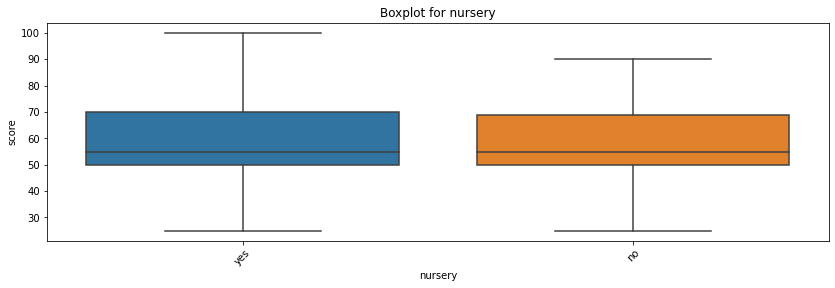

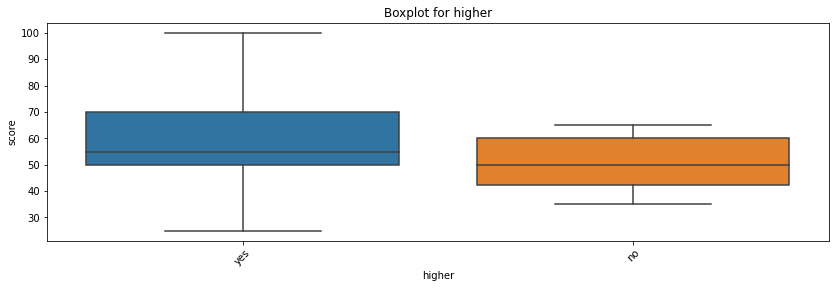

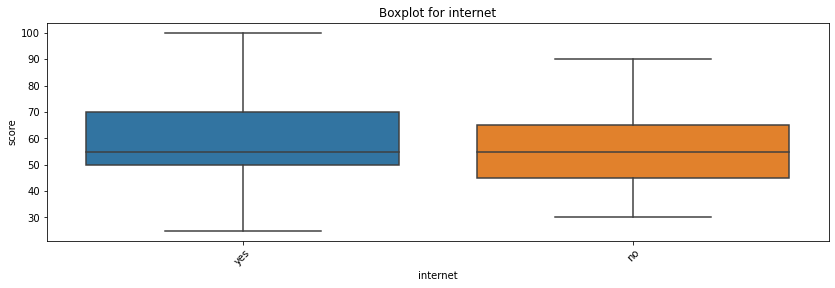

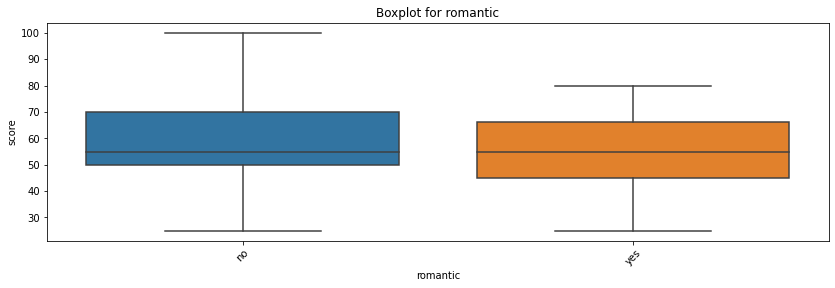

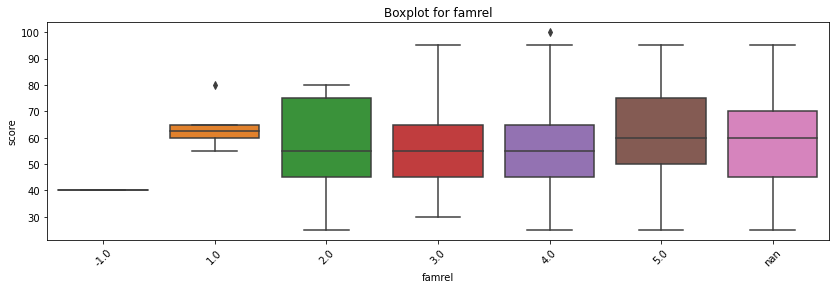

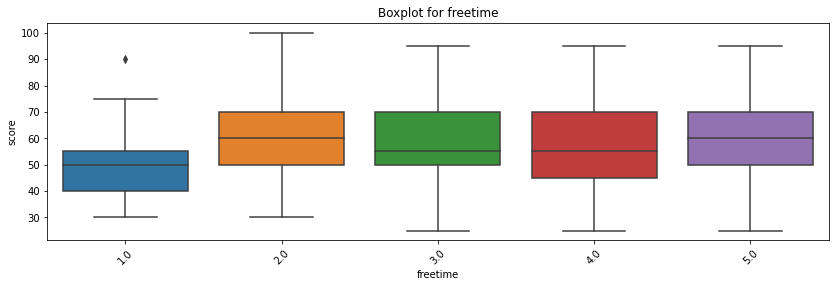

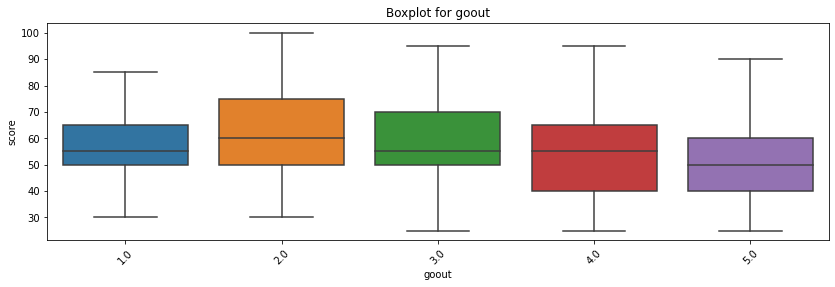

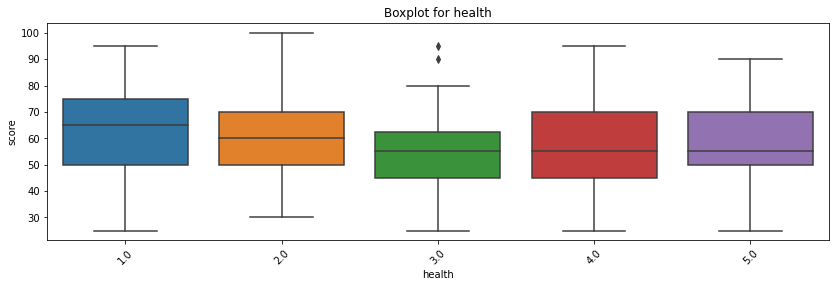

In [28]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Mjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [29]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Mjob', 'reason', 'guardian', 
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


#### В данных не много пустых значений. Выбросы найдены в колонке absences. 
#### В колонке score найдены нулевые значения, что готовит от ошибке заполнения данных либо и пропуске экзамена. 
#### Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это: 
#### age, absences, sex, address, Medu, Mjob, studytime, failures, schoolsup, goout.